In [1]:
pwd

'/home/vmu/nu_stats/examples/bayes_hierarchical_model'

In [2]:
%cd examples/bayes_hierarchical_model/

[Errno 2] No such file or directory: 'examples/bayes_hierarchical_model/'
/home/vmu/nu_stats/examples/bayes_hierarchical_model


In [3]:
#import dill

In [4]:
#dill.load_session('notebook_env.db')

In [5]:
#dill.dump_session('notebook_env1203.db')

In [6]:
%load_ext autoreload
%autoreload 2

# SIM

In [7]:
from astropy import units as u
import numpy as np
from cmdstanpy import CmdStanModel
import arviz, corner
from matplotlib import pyplot as plt

In [8]:
import sys
sys.path.append("../../")
from nu_stats.simulation import Simulation
from nu_stats.plotting import unit_vectors_skymap as u_v_s

In [9]:
# Simulation parameters
L = 1e48 * (u.erg/u.s)
gamma = 2.2
z = 0.3
F_diff_norm = 1e-15 * 1/(u.GeV * u.cm**2 * u.s)
Emin = 1e5 * u.GeV
Emax = 1e8 * u.GeV
Enorm = 1e5 * u.GeV

In [10]:
sim = Simulation(L, gamma, z, F_diff_norm, Emin, Emax, Enorm,)
sim.run(seed=40)


Simulated 274 events


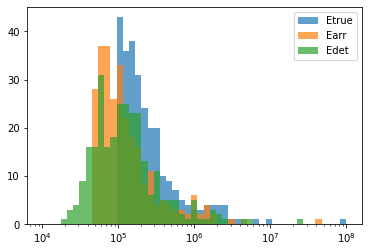

In [11]:
sim.show_spectrum()

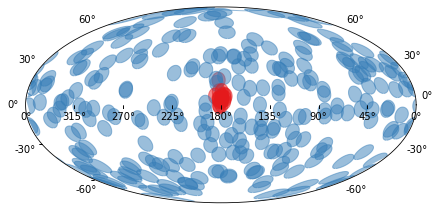

In [12]:
sim.show_skymap()

In [13]:
sim.truth

OrderedDict([('L', 6.2415090744607645e+50),
             ('gamma', 2.2),
             ('F_diff', 8.331240094640407e-07),
             ('f', <Quantity 0.05463271>)])

In [14]:
sim.labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
# Extract simulated data and get info needed for fit
fit_input = sim.get_data()

In [16]:
#fit_input

# FQTIST FIT

In [17]:
from nu_stats.fqutils import FqStructure, plot_loghist

In [18]:
# With energy part
fq = FqStructure(z, Emin, Emax, Esim_gamma = 1.4, n_Esim=100000)

Generating marginalized energy likelihood..


/home/vmu/Envs/exj/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Simulated 100000 events
Marginalized energy likelihood generated.


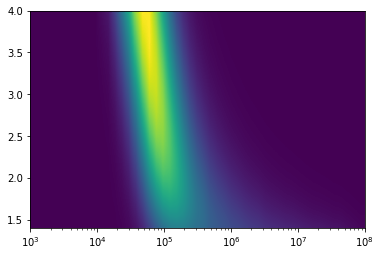

In [19]:
fq.energy_likelihood.plot_pdf_meshgrid()
plt.xscale('log')

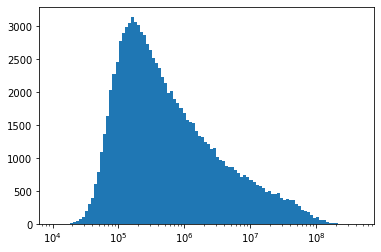

In [20]:
plot_loghist(fq.Esim.Edet.value,bins=100);

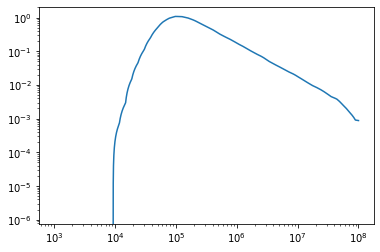

In [21]:
fq.energy_likelihood.plot_pdf_at_idx(2)
plt.xscale('log')
plt.yscale('log')

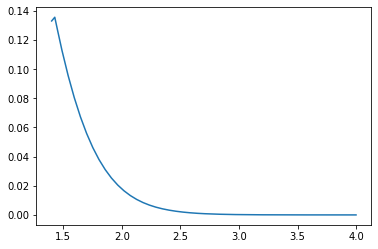

In [22]:
fq.energy_likelihood.plot_pdf_at_E(1e7)

The log(full fit input likelihood) for a pair n_s, gamma can be evaluated as follows:

In [23]:
n_s_eg = 3
gamma_eg = 2
fq.fit_input = fit_input
fq.log_band_likelihood(n_s_eg, gamma_eg)

-148.07703840352357

Above can be evaluated for arrays of different n_s and gamma as follows:

In [24]:
n_ss = np.arange(fit_input['N'])
gammas = np.linspace(1.6,4,100) 
glbl = fq.grid_log_band_likelihood(n_ss, gammas) # *

# result is saved in the fq object as well
assert (glbl == fq.lbl_grid).all() 

n_h, g_h = fq.argmax_band_likelihood()
# no args: grid kept from *


In [25]:
sum(sim.labels==0)

19

In [26]:
n_h

12

In [27]:
g_h

2.327272727272727

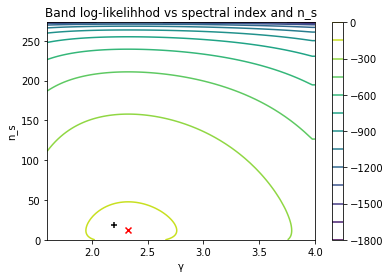

In [28]:
fq.plot_lbl_contour()
plt.scatter(sim.truth['gamma'], sum(sim.labels==0), marker='+', c ='k')
# plt.ylim(3,20)
plt.show()


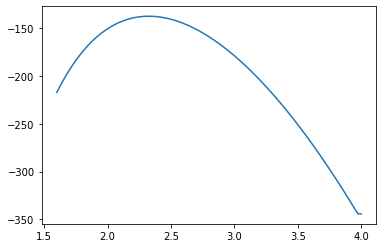

In [29]:
plt.plot(gammas, fq.lbl_grid[1,:]); # log_likelihood for 15th event

In [30]:
m = fq.minimize_neg_lbl()[0]


In [31]:
m.minos()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 131.7                      │              Nfcn = 98               │
│ EDM = 1.31e-06 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s   │    12     │     4     │     -4     │     4      │    0    │   273   │       │
│ 1 │ gamma │   2.33    │   0.06    │   -0.07    │    0.06    │   1.4   │    4    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          n_s          │         gamma         │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │    -4     │     4     │   -0.07   │   0.06    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬─────────────────────┐
│       │       n_s     gamma │
├───────┼─────────────────────┤
│   n_s │      17.5 -2.34e-10 │
│ gamma │ -2.34e-10   0.00383 │
└───────┴─────────────────────┘

In [33]:
m.parameters

('n_s', 'gamma')

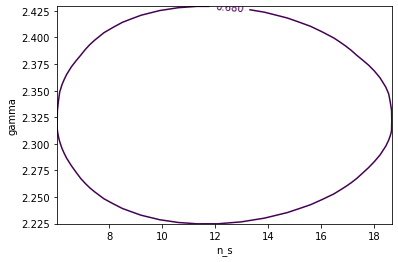

In [35]:
m.draw_mncontour('n_s','gamma')

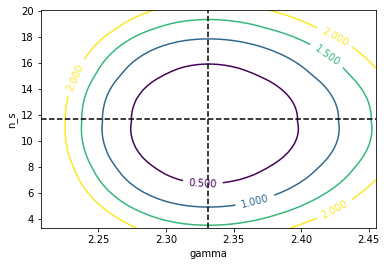

In [36]:
m.draw_contour('gamma','n_s');

The source likelihood for a specific event for different gammas can be evaluated as follows:

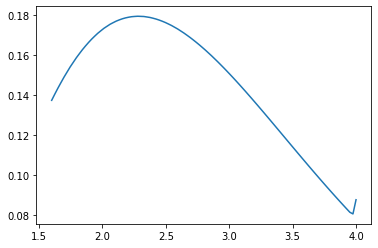

In [37]:
fq.event_source_likelihood_from_index(gammas, 30)
plt.plot(gammas, fq.sl_arr)
plt.show()

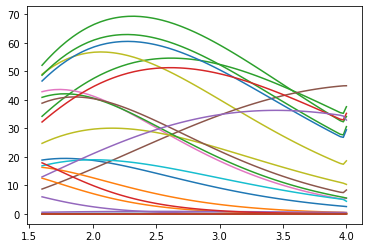

In [39]:
for event_i in range(fit_input['N']):
    plt.plot(gammas,
         fq.event_source_likelihood_from_index(gammas, event_i))
plt.show()

## FqStructure can also be set to ignore energy part:

In [38]:
fq_noE = FqStructure() # Only spatial

Marginalized energy likelihood taken to be 1.


In [39]:
#fq_noE.log_band_likelihood(fit_input, 39,2)

In [40]:
glbl = fq_noE.grid_log_band_likelihood(np.arange(fit_input['N']),  np.linspace(1.5,4), fit_input=fit_input)

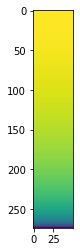

In [41]:
plt.imshow(glbl)

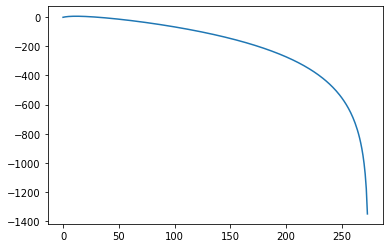

In [42]:
plt.plot(glbl[:,1]);

In [43]:
m = fq_noE.minimize_neg_lbl()[0]

In [44]:
m.minos()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -7.264                     │              Nfcn = 24               │
│ EDM = 7.53e-08 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s   │    12     │     4     │     -4     │     4      │    0    │   273   │       │
│ 1 │ gamma │    0.0    │    0.1    │            │            │         │         │  yes  │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          n_s          │
├──────────┼───────────┬───────────┤
│  Error   │    -4     │     4     │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───────┬─────────────┐
│       │   n_s gamma │
├───────┼─────────────┤
│   n_s │  17.5     0 │
│ gamma │     0     0 │
└───────┴─────────────┘

## Individual associations

In [45]:
bg_sim = Simulation(0*u.erg/u.s, gamma, z, F_diff_norm, Emin, Emax, Enorm, 100000)
bg_sim.run(seed=12345678)
bg_dat = bg_sim.get_data()

Simulated 100000 events


In [46]:
bg_sim.truth

OrderedDict([('L', 0.0),
             ('gamma', 2.2),
             ('F_diff', 8.331240094640407e-07),
             ('f', <Quantity 0.>)])

In [47]:
## get p values
sim_TS, bg_TS, sim_p = fq.event_statistics(fit_input, bg_dat, 2)
## set label 0 for p<.01 and 1 for p>=.01
labels = (sim_p >=.01).astype(int)

../../nu_stats/fqutils.py:312: RuntimeWarning: invalid value encountered in double_scalars
  TS[j] = 2*np.log(S / self.bg_likelihood(E_r[j], gamma))


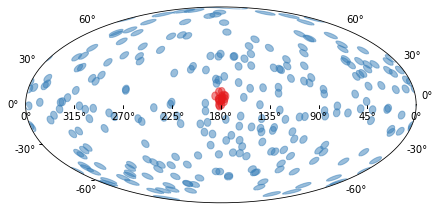

In [48]:
u_v_s(fit_input['det_dir'], labels);

In [49]:
np.mean(labels == sim.labels)

0.9963503649635036

In [50]:
print(f'Source event fraction\nfit: {np.mean(1-labels)}\n\
true: {np.mean(1-sim.labels)}\n\n\
False source events: {np.inner(1-sim.labels, labels)}\n\
False bg events: {np.inner(1-labels, sim.labels)}')

Source event fraction
fit: 0.06569343065693431
true: 0.06934306569343066

False source events: 1
False bg events: 0


In [51]:
bg_TS.sort()

In [52]:
frac = lambda x: np.mean(bg_TS > x)
y = np.array([frac(elem) for elem in bg_TS])

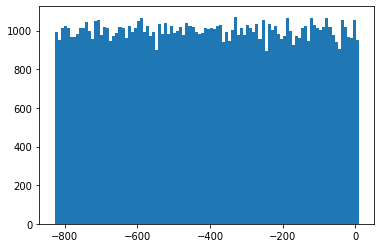

In [53]:
plt.hist(bg_TS,bins=100);

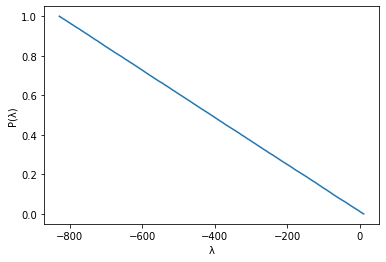

In [54]:

plt.step(bg_TS, y);
plt.xlabel('λ');
plt.ylabel('P(λ)');
#plt.yscale('log');

# BHM

In [55]:
stan_model = CmdStanModel(stan_file="stan/toy_bhm.stan")
fit = stan_model.sample(data=fit_input, iter_sampling=1000, chains=4, seed=42)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/vmu/nu_stats/examples/bayes_hierarchical_model/stan/toy_bhm
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4


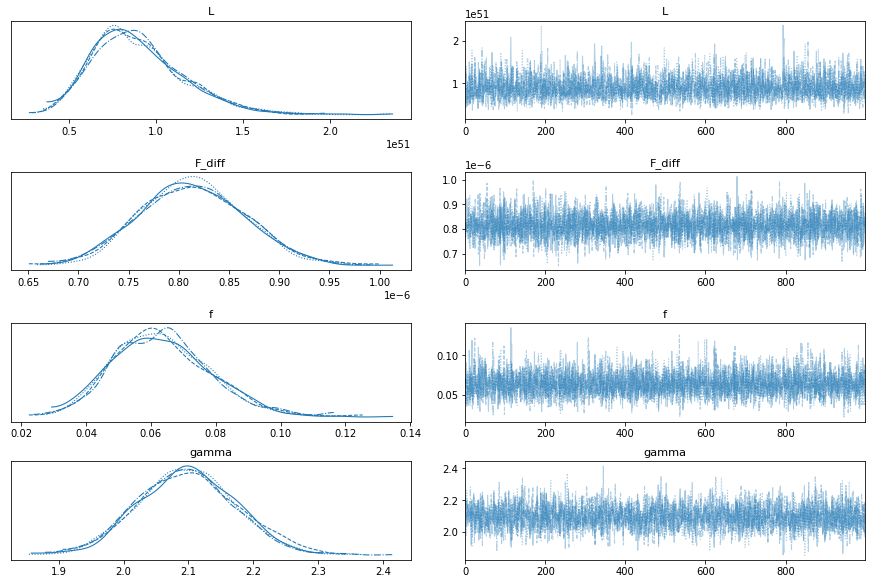

In [56]:
# Trace plot
var_names = ["L", "F_diff", "f", "gamma"]
arviz.plot_trace(fit, var_names=var_names);


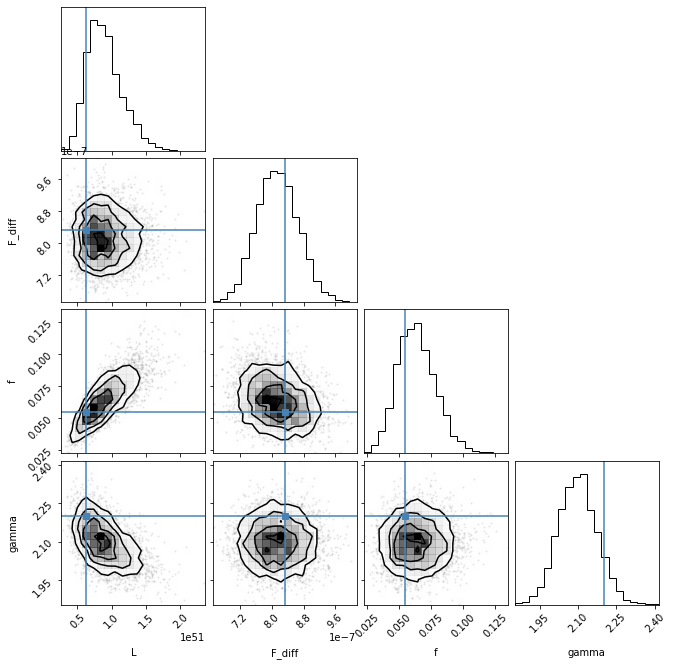

In [57]:
# Corner plot, comparing with truth form sim
variables = fit.stan_variables()
samples = np.column_stack([variables[key] for key in var_names])
truths_list = [sim.truth[key] for key in var_names]

corner.corner(samples, labels=var_names, truths=truths_list);

In [58]:
fit.diagnose()


INFO:cmdstanpy:Processing csv files: /tmp/tmpjgt3_033/toy_bhm-202103221836-1-4um8nxz0.csv, /tmp/tmpjgt3_033/toy_bhm-202103221836-2-fmr96c3x.csv, /tmp/tmpjgt3_033/toy_bhm-202103221836-3-i0tfcfcl.csv, /tmp/tmpjgt3_033/toy_bhm-202103221836-4-jk76fk3p.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


'Processing csv files: /tmp/tmpjgt3_033/toy_bhm-202103221836-1-4um8nxz0.csv, /tmp/tmpjgt3_033/toy_bhm-202103221836-2-fmr96c3x.csv, /tmp/tmpjgt3_033/toy_bhm-202103221836-3-i0tfcfcl.csv, /tmp/tmpjgt3_033/toy_bhm-202103221836-4-jk76fk3p.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory for all transitions.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.'

In [59]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-8.700000e+03,4.300000e-01,1.400000e+01,-8.700000e+03,-8.700000e+03,-8.700000e+03,1000.0,20.0,1.0
gamma,2.100000e+00,1.300000e-03,7.500000e-02,2.000000e+00,2.100000e+00,2.200000e+00,3400.0,68.0,1.0
L,9.000000e+50,4.000000e+48,2.600000e+50,5.300000e+50,8.600000e+50,1.400000e+51,4300.0,85.0,1.0
F_diff,8.100000e-07,6.300000e-10,5.200000e-08,7.300000e-07,8.100000e-07,9.000000e-07,6800.0,140.0,1.0
Etrue[1],1.506010e+05,6.580000e+02,5.065300e+04,1.029130e+05,1.358250e+05,2.481360e+05,5921.0,118.0,1.0
...,...,...,...,...,...,...,...,...,...
Earr[270],8.252900e+04,4.190000e+02,3.220700e+04,5.172400e+04,7.348400e+04,1.432140e+05,5919.0,118.0,1.0
Earr[271],1.512870e+05,1.035000e+03,8.136800e+04,6.172000e+04,1.309370e+05,3.068110e+05,6186.0,123.0,1.0
Earr[272],7.828200e+04,3.840000e+02,2.914400e+04,5.138700e+04,6.960200e+04,1.370430e+05,5745.0,115.0,1.0


In [60]:
fit.stan_variable('log_prob').shape

(4000, 274, 2)

## Individual associations


In [61]:
import nu_stats.bhmutils as bhm

In [62]:
association = bhm.classify_events(fit_input, fit)

In [63]:
labels_b = (association[:,0] <.01).astype(int)

In [64]:
labels_b

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
labels_b.mean()

0.9197080291970803

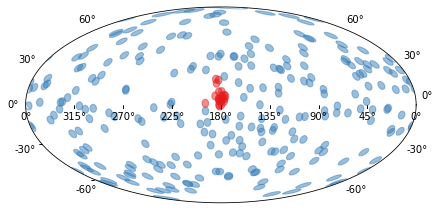

In [66]:
u_v_s(fit_input['det_dir'], labels_b);

In [67]:
np.mean(labels_b == sim.labels)

0.9890510948905109

In [68]:
print(f'Source event fraction\nfit: {np.mean(1-labels_b)}\n\
true: {np.mean(1-sim.labels)}\n\n\
False source events: {np.inner(sim.labels, 1-labels_b)}\n\
False bg events: {np.inner(labels_b, 1-sim.labels)}')

Source event fraction
fit: 0.08029197080291971
true: 0.06934306569343066

False source events: 3
False bg events: 0
